In [1]:
options(stringsAsFactors=FALSE)

In [2]:
library(data.table)
library(cowplot)
library(Matrix)
library(BuenColors)

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: MASS


In [3]:
metrics_pctcells = read.csv('./peaks_frequency_results/metrics/clustering_scores.csv',
                         row.names=1)
metrics_pctcells[['cutoff']] = as.numeric(substring(rownames(metrics_pctcells),15))

metrics_nreads = read.csv('./peaks_intensity_results/metrics/clustering_scores.csv',
                         row.names=1)
metrics_nreads[['cutoff']] = as.numeric(substring(rownames(metrics_pctcells),15))

In [4]:
head(metrics_nreads)

,ARI_Louvain,ARI_kmeans,ARI_HC,AMI_Louvain,AMI_kmeans,AMI_HC,Homogeneity_Louvain,Homogeneity_kmeans,Homogeneity_HC,cutoff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cusanovich20181,1.0000000,0.7736074,1.0000000,1.0000000,0.9001646,1.0000000,1.0000000,0.8710491,1.0000000,1.0
Cusanovich20180.8,1.0000000,0.7738015,1.0000000,1.0000000,0.9002461,1.0000000,1.0000000,0.8710491,1.0000000,0.8
Cusanovich20180.6,0.9979967,0.7732505,0.9979967,0.9970535,0.9000151,0.9970535,0.9970695,0.8710491,0.9970695,0.6
Cusanovich20180.4,1.0000000,0.7704817,1.0000000,1.0000000,0.8965994,1.0000000,1.0000000,0.8684445,1.0000000,0.4
Cusanovich20180.2,1.0000000,0.7757297,0.7692617,1.0000000,0.9010634,0.8937381,1.0000000,0.8710491,0.8655306,0.2
Cusanovich20180.1,0.9801787,0.7645857,0.7634157,0.9758596,0.8839081,0.8831449,0.9759782,0.8563853,0.8555625,0.1


In [5]:
head(metrics_pctcells)

,ARI_Louvain,ARI_kmeans,ARI_HC,AMI_Louvain,AMI_kmeans,AMI_HC,Homogeneity_Louvain,Homogeneity_kmeans,Homogeneity_HC,cutoff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cusanovich20181,1.0000000,0.7736074,1.0000000,1.0000000,0.9001646,1.0000000,1.0000000,0.8710491,1.0000000,1.0
Cusanovich20180.8,1.0000000,0.7754522,1.0000000,1.0000000,0.9009450,1.0000000,1.0000000,0.8710491,1.0000000,0.8
Cusanovich20180.6,0.9979967,0.7720950,0.9959933,0.9970535,0.8995341,0.9941069,0.9970695,0.8710491,0.9941391,0.6
Cusanovich20180.4,0.9979967,0.7707574,0.7766242,0.9970535,0.8967201,0.9014473,0.9970695,0.8684734,0.8710491,0.4
Cusanovich20180.2,0.9979967,0.7757297,0.7815716,0.9970535,0.9010634,0.9036290,0.9970695,0.8710491,0.8710491,0.2
Cusanovich20180.1,0.9762718,0.7563309,0.7621807,0.9714091,0.8741906,0.8767174,0.9715652,0.8479902,0.8479344,0.1


In [6]:
df_merge = rbind(metrics_pctcells,metrics_nreads)

In [7]:
df_merge[['group']] = c(rep('Fequency',dim(metrics_pctcells)[1]),rep('Intensity',dim(metrics_nreads)[1]))

In [8]:
df_merge[['ID']] = rownames(df_merge)

In [9]:
df_merge_new = data.frame(name=character(0),group= character(0), clustering= character(0), 
                          metric = character(0),value = numeric(0),cutoff=numeric(0),stringsAsFactors=FALSE)

In [10]:
for(x in rownames(df_merge)){
    for (y in colnames(df_merge)[1:9]){
        str_split = strsplit(y,'_')[[1]]
        x_metric = str_split[1]
        x_clustering = str_split[2]
        x_value = df_merge[x,y]
        new_row = list(name=x,group=df_merge[x,'group'],clustering=x_clustering,
                       metric=x_metric,value=x_value,cutoff=df_merge[x,'cutoff'])
        df_merge_new = rbind(df_merge_new,new_row)
    }
}

In [11]:
df_merge_new[df_merge_new=="louvain"]<-'Louvain'
df_merge_new[df_merge_new=="hc"]<-'HC'

In [12]:
df_merge_new

name,group,clustering,metric,value,cutoff
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Cusanovich20181,Fequency,Louvain,ARI,1.0000000,1.0
Cusanovich20181,Fequency,kmeans,ARI,0.7736074,1.0
Cusanovich20181,Fequency,HC,ARI,1.0000000,1.0
Cusanovich20181,Fequency,Louvain,AMI,1.0000000,1.0
Cusanovich20181,Fequency,kmeans,AMI,0.9001646,1.0
Cusanovich20181,Fequency,HC,AMI,1.0000000,1.0
Cusanovich20181,Fequency,Louvain,Homogeneity,1.0000000,1.0
Cusanovich20181,Fequency,kmeans,Homogeneity,0.8710491,1.0
Cusanovich20181,Fequency,HC,Homogeneity,1.0000000,1.0


In [13]:
min(df_merge_new$value)

[1] 0.3880611

In [14]:
p <- ggplot(df_merge_new, aes(cutoff, value,color=factor(group))) + 
        geom_point(size=2,alpha=0.8)+
        geom_line(size=1.5,alpha=0.8) + 
        theme_bw() +
        theme(legend.position='top',
              text = element_text(colour = "black"),
              axis.text.x = element_text(color = "black"),
              axis.text.y = element_text(color = "black"),
              axis.title.x = element_text(color = 'black'),
              axis.title.y = element_text(color = 'black')) +
        xlab('Cutoff') + ylab('Score')+
        ylim(-0.05, 1)+
        labs(color='peak selection')+
        scale_x_reverse()

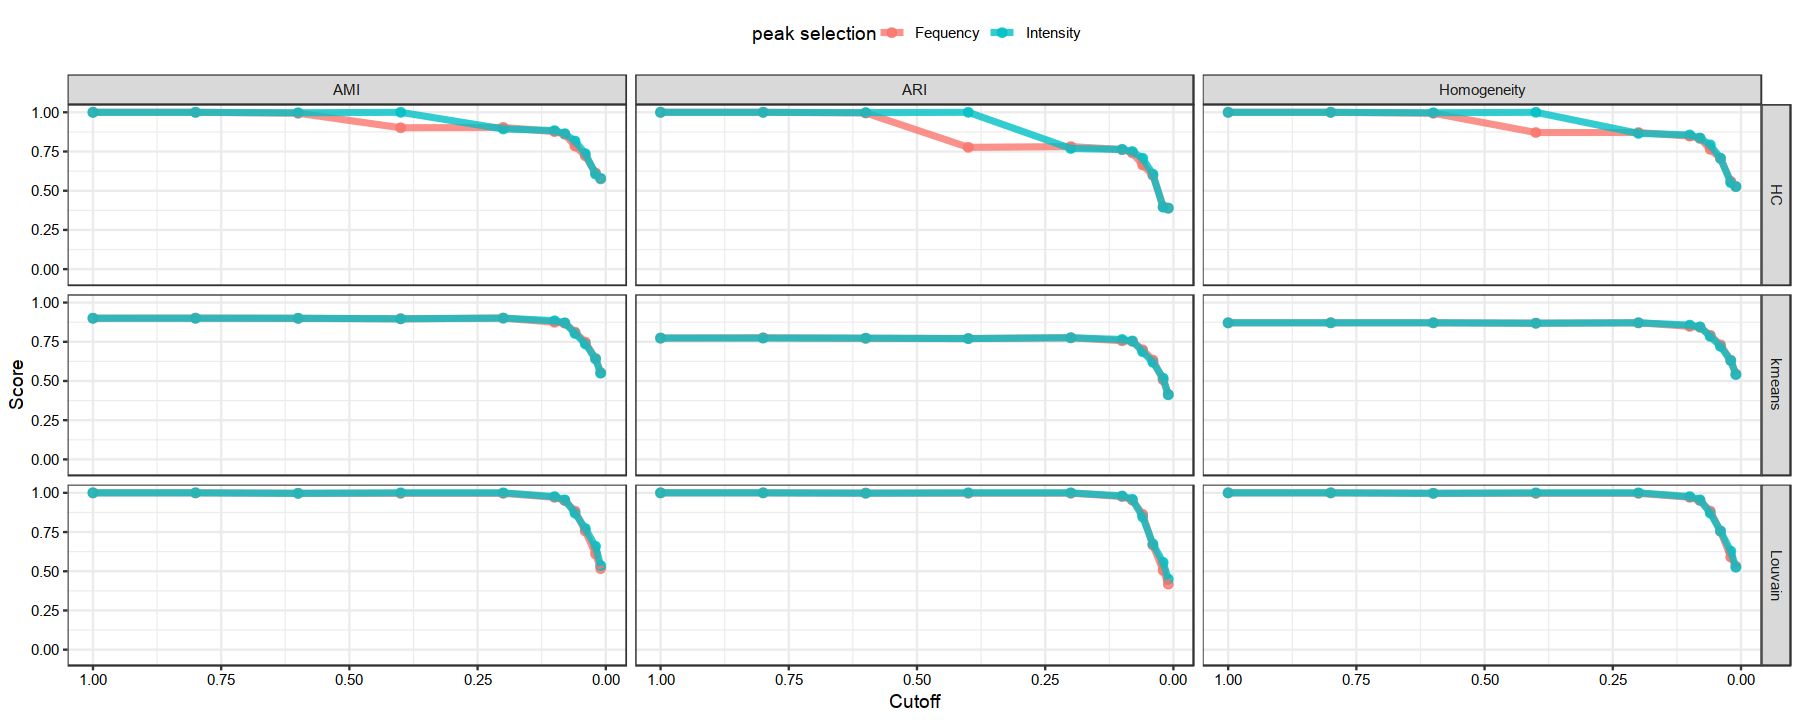

In [22]:
options(repr.plot.width=3*5, repr.plot.height=3*2)
p + facet_grid(vars(clustering), vars(metric))

In [23]:
ggsave(p + facet_grid(vars(clustering), vars(metric)),filename = 'Cusanovich2018_BMp2.pdf',width = 3*5, height = 3*2)